In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Загрузка и подготовка данных

In [339]:
df = pd.read_csv(r'https://raw.githubusercontent.com/DVL-83/Educational-materials/refs/heads/main/marketing_AB.csv')

In [340]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


##### Проверяем на анличие пропусков

In [344]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [346]:
##### Пропусков нет

##### Что бы понять куда двигаться просмотрим уникальные значения столбцов

In [349]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [351]:
# 2 группы тестируемых (каждой из групп показывали 2 разные рекламы)

In [353]:
df['converted'].unique()

array([False,  True])

In [355]:
# Реклама оказалась эффективной или нет

In [357]:
df['most ads day'].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [359]:
# Популярные рекламные дни

In [361]:
df['most ads hour'].unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5], dtype=int64)

In [363]:
# Самое большое рекламное время

In [367]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


##### Разделяем на 2 тестируемые группы

In [370]:
group_a = df[df['test group'] == 'ad']
group_a.shape

(564577, 7)

In [372]:
group_b = df[df['test group'] == 'psa']
group_b.shape

(23524, 7)

# 1. Анализ группы клиентов и определение успешности рекламы
## Конверсия

In [375]:
print('Конверсия всего:', df[df['converted'] == 1].shape[0] / df['converted'].shape[0])
print('Конверсия группы А:', group_a[group_a['converted'] == 1].shape[0] / group_a.shape[0])
print('Конверсия группы Б:', group_b[group_b['converted'] == 1].shape[0] / group_b.shape[0])

Конверсия всего: 0.02523886203220195
Конверсия группы А: 0.025546559636683747
Конверсия группы Б: 0.01785410644448223


In [377]:
group_aa = group_a[group_a['converted'] == 1]

In [379]:
group_bb = group_b[group_b['converted'] == 1]

## Тест на значимость разницы между группами

In [382]:
group_a['converted'].fillna(0).mean()

0.025546559636683747

In [384]:
group_b['converted'].fillna(0).mean()

0.01785410644448223

In [386]:
stats.ttest_ind(group_a['converted'].fillna(0), group_b['converted'].fillna(0))

TtestResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13, df=588099.0)

Нулевая гипотеза теста - это равенство средней конверсии в обеих группах

p-значение - это вероятность увидеть данную выборку при условии, что нулевая гипотеза верна (0,0........17%)

Сравниваем р-значение с альфой = 5%

р-значение < 5% <= отвергаем нулевую гипотезу

Конверсия в группе, которой показывали вариант рекламы А, и в группе, которой показывали вариант рекламы Б, отличаются

In [389]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_a[group_a['converted'] == 1].shape[0] / group_a.shape[0]
con_b = group_b[group_b['converted'] == 1].shape[0] / group_b.shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(conversion_a > conversion_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.025546559636683747 0.01785410644448223


## Реклама объявлений лучше чем социальная реклама.

# 2. Поиск гетерогенных эффектов от рекламы

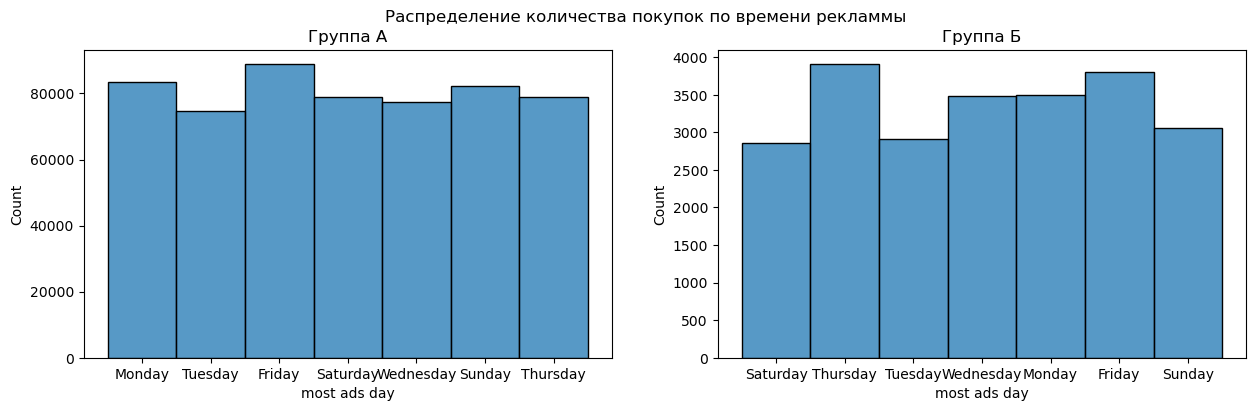

In [393]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
plt.suptitle('Распределение количества покупок по времени рекламмы')
sns.histplot(group_a['most ads day'], ax = ax[0])
sns.histplot(group_b['most ads day'], ax = ax[1])
ax[0].set_title('Группа А')
ax[1].set_title('Группа Б')
plt.show()

In [395]:
group_a.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.022465
Monday       0.033241
Saturday     0.021307
Sunday       0.024620
Thursday     0.021637
Tuesday      0.030440
Wednesday    0.025356
Name: converted, dtype: float64

In [397]:
group_b.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.016303
Monday       0.022559
Saturday     0.013996
Sunday       0.020595
Thursday     0.020230
Tuesday      0.014448
Wednesday    0.015759
Name: converted, dtype: float64

### Проведем тест на значимость эффекта отдельно для дня недели 'Sunday'

In [400]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Sunday']['converted'], group_b[group_b['most ads day'] == 'Sunday']['converted'])

TtestResult(statistic=1.4145989240334367, pvalue=0.15718977081077093, df=85389.0)

pvalue=15% - Не отвергаем нулевую гипотезу: Конверсия группы A равна Конверсии группы B

### Проведем тест на значимость эффекта отдельно для дня недели 'Monday'

In [404]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Monday']['converted'], group_b[group_b['most ads day'] == 'Monday']['converted'])

TtestResult(statistic=3.4767998173189745, pvalue=0.0005076838310420105, df=87071.0)

pvalue=0,05% - Отвергаем нулевую гипотезу: Конверсия группы A не равна Конверсии группы B

In [407]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_aa[group_aa['most ads day'] == 'Monday'].shape[0] /group_a[group_a['most ads day'] == 'Monday'].shape[0]
con_b = group_bb[group_bb['most ads day'] == 'Monday'].shape[0] /group_b[group_b['most ads day'] == 'Monday'].shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(con_a > con_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.033241196108697996 0.022558537978298116


### Проведем тест на значимость эффекта отдельно для дня недели 'Tuesday'

In [410]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Tuesday']['converted'], group_b[group_b['most ads day'] == 'Tuesday']['converted'])

TtestResult(statistic=4.9725001795688915, pvalue=6.623580376546489e-07, df=77477.0)

pvalue=0.....6% - Отвергаем нулевую гипотезу: Конверсия группы A равна Конверсии группы B

In [436]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_aa[group_aa['most ads day'] == 'Tuesday'].shape[0] /group_a[group_a['most ads day'] == 'Tuesday'].shape[0]
con_b = group_bb[group_bb['most ads day'] == 'Tuesday'].shape[0] /group_b[group_b['most ads day'] == 'Tuesday'].shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(con_a > con_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.03044037976720485 0.014447884416924664


### Проведем тест на значимость эффекта отдельно для дня недели 'Wednesday'

In [414]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Wednesday']['converted'], group_b[group_b['most ads day'] == 'Wednesday']['converted'])

TtestResult(statistic=3.556325296980843, pvalue=0.00037629299081835306, df=80906.0)

pvalue=0.3% - Отвергаем нулевую гипотезу: Конверсия группы A не равна Конверсии группы B

In [417]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_aa[group_aa['most ads day'] == 'Wednesday'].shape[0] /group_a[group_a['most ads day'] == 'Wednesday'].shape[0]
con_b = group_bb[group_bb['most ads day'] == 'Wednesday'].shape[0] /group_b[group_b['most ads day'] == 'Wednesday'].shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(con_a > con_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.025355860394223564 0.015759312320916905


### Проведем тест на значимость эффекта отдельно для дня недели 'Thursday'

In [420]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Thursday']['converted'], group_b[group_b['most ads day'] == 'Thursday']['converted'])

TtestResult(statistic=0.5906506740406489, pvalue=0.5547561128146212, df=82980.0)

pvalue=55,4% - Не отвергаем нулевую гипотезу: Конверсия группы A равна Конверсии группы B

### Проведем тест на значимость эффекта отдельно для дня недели 'Friday'

In [424]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Friday']['converted'], group_b[group_b['most ads day'] == 'Friday']['converted'])

TtestResult(statistic=2.5250884891161647, pvalue=0.011568571026075112, df=92606.0)

pvalue=1.1% - Отвергаем нулевую гипотезу: Конверсия группы A не равна Конверсии группы B

In [427]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_aa[group_aa['most ads day'] == 'Friday'].shape[0] /group_a[group_a['most ads day'] == 'Friday'].shape[0]
con_b = group_bb[group_bb['most ads day'] == 'Friday'].shape[0] /group_b[group_b['most ads day'] == 'Friday'].shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(con_a > con_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.022464951297787288 0.01630291874835656


### Проведем тест на значимость эффекта отдельно для дня недели 'Saturday'

In [430]:
stats.ttest_ind(group_a[group_a['most ads day'] == 'Saturday']['converted'], group_b[group_b['most ads day'] == 'Saturday']['converted'])

TtestResult(statistic=2.6745960256483388, pvalue=0.007483424454519301, df=81658.0)

pvalue=0.7% - Отвергаем нулевую гипотезу: Конверсия группы A не равна Конверсии группы B

In [433]:
# Рассчитываем коэффициент конверсии для группы A и группы B
con_a = group_aa[group_aa['most ads day'] == 'Saturday'].shape[0] /group_a[group_a['most ads day'] == 'Saturday'].shape[0]
con_b = group_bb[group_bb['most ads day'] == 'Saturday'].shape[0] /group_b[group_b['most ads day'] == 'Saturday'].shape[0]

# Сравниваем конверсии и выводим результат
result = np.where(con_a > con_b, 
                  'Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А)', 
                  'Конверсия группы Б больше: При социальной рекламе было больше покупок (группа Б)')

print(result,con_a,con_b)

Конверсия группы А больше: При рекламе объявлений было больше покупок (группа А) 0.021306565823202457 0.013995801259622114


# Таким образом получаем, что эффект от показа рекламы объявлений выше чем от социальной рекламы кроме таких дней как воскресенье и четверг.